### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos

***
## Redes Neuronales

Mateo Neira
***

# Introducción a las Redes Neuronales con Scikit-learn

**Objetivo:** Construir y entrenar una red neuronal simple (un Perceptrón Multicapa) para una tarea de clasificación de imágenes utilizando la librería `scikit-learn`.

In [2]:
# 1. Importar Librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Cargar y Explorar el Dataset `digits`

Scikit-learn viene con varios datasets de juguete. Usaremos `digits`, que contiene imágenes de 8x8 píxeles de dígitos escritos a mano (del 0 al 9). El objetivo es clasificar correctamente cada imagen.

In [3]:
# Cargar el dataset
digits = load_digits()

# El dataset se comporta como un diccionario
print("Claves del dataset:", digits.keys())

# X son los datos (las imágenes aplanadas), y son las etiquetas (el número real)
X, y = digits.data, digits.target

print("Forma de los datos (X):", X.shape)
print("Forma de las etiquetas (y):", y.shape)

Claves del dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Forma de los datos (X): (1797, 64)
Forma de las etiquetas (y): (1797,)


Tenemos 1797 imágenes, y cada una está representada por un vector de 64 características (8x8 = 64 píxeles).

Vamos a visualizar algunas de estas imágenes para entender mejor los datos.

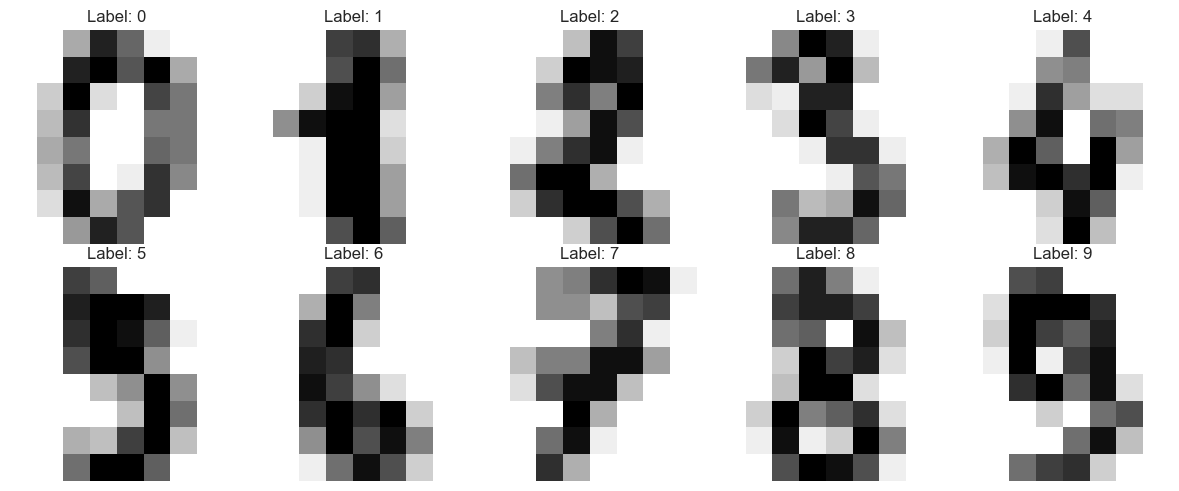

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preprocesamiento de Datos

Las redes neuronales son sensibles a la escala de las características. Los valores de los píxeles en este dataset van de 0 a 16. Es una buena práctica escalar los datos para que tengan una media de 0 y una desviación estándar de 1.

También dividiremos los datos en un conjunto de entrenamiento y uno de prueba.

In [6]:
# Dividir los datos ANTES de escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Valor mínimo y máximo en el set de entrenamiento escalado: {X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}")

Valor mínimo y máximo en el set de entrenamiento escalado: -2.98, 36.69


## Construir y Entrenar la Red Neuronal

Usaremos `MLPClassifier` de Scikit-learn. Definiremos una arquitectura simple:
*   Una capa de entrada con 64 neuronas (una por píxel).
*   Dos capas ocultas, cada una con 50 neuronas.
*   Una capa de salida con 10 neuronas (una por cada clase de dígito), que usará una función de activación Softmax internamente.

In [7]:
# Instanciar el clasificador
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 50),  # Dos capas ocultas con 50 neuronas cada una
    activation='relu',             # Función de activación ReLU
    solver='adam',                 # Optimizador eficiente
    max_iter=500,                  # Número máximo de épocas
    random_state=42,
    verbose=False                  # Poner en True para ver el progreso del entrenamiento
)

# Entrenar el modelo
print("Entrenando la red neuronal...")
mlp.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado!")

Entrenando la red neuronal...
¡Entrenamiento completado!


## Evaluar el Modelo

Ahora que el modelo está entrenado, evaluemos su rendimiento en el conjunto de prueba, que no ha visto durante el entrenamiento.

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.94      0.98      0.96        46
           2       0.96      1.00      0.98        44
           3       1.00      0.98      0.99        46
           4       0.98      1.00      0.99        45
           5       1.00      0.98      0.99        46
           6       1.00      1.00      1.00        45
           7       0.96      1.00      0.98        45
           8       0.95      0.91      0.93        43
           9       0.98      0.93      0.95        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



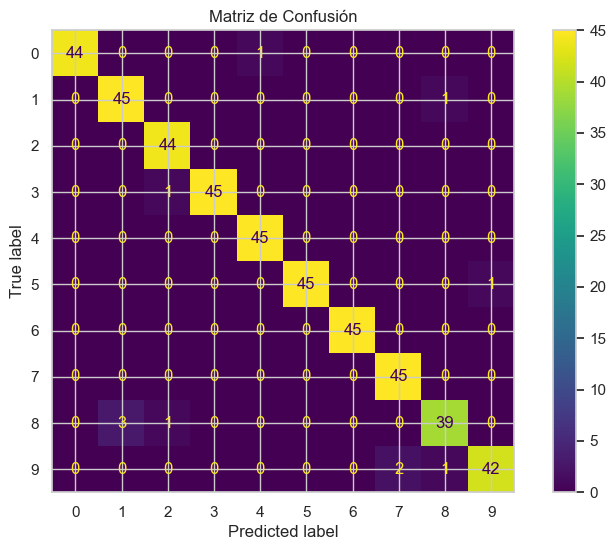

In [8]:
# Realizar predicciones
y_pred = mlp.predict(X_test_scaled)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

El modelo alcanza una precisión (accuracy) de alrededor del 98%, lo cual es excelente. La matriz de confusión muestra que la mayoría de los errores son confusiones entre números visualmente similares (por ejemplo, un '8' predicho como '1', o un '9' como '3').

## 6. Visualizar la Curva de Pérdida

El `MLPClassifier` guarda la pérdida (el error) en cada época de entrenamiento. Podemos graficarla para ver cómo el modelo "aprendió" y convergió.

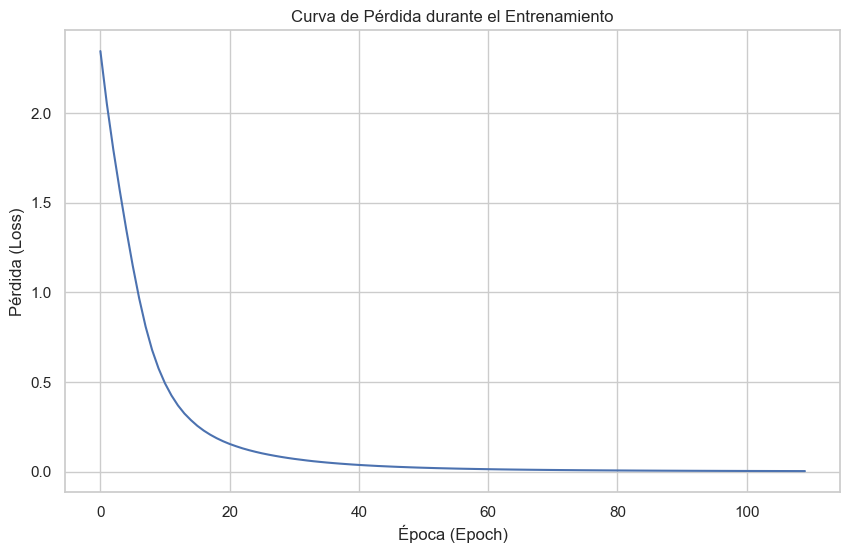

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.xlabel("Época (Epoch)")
plt.ylabel("Pérdida (Loss)")
plt.grid(True)
plt.show()

La pérdida disminuye drásticamente en las primeras épocas y luego se estabiliza, lo que indica que el modelo ha convergido a una buena solución.

## 7. Inspeccionar Predicciones Individuales

Finalmente, veamos algunas predicciones específicas en el conjunto de prueba para tener una idea cualitativa del rendimiento del modelo.

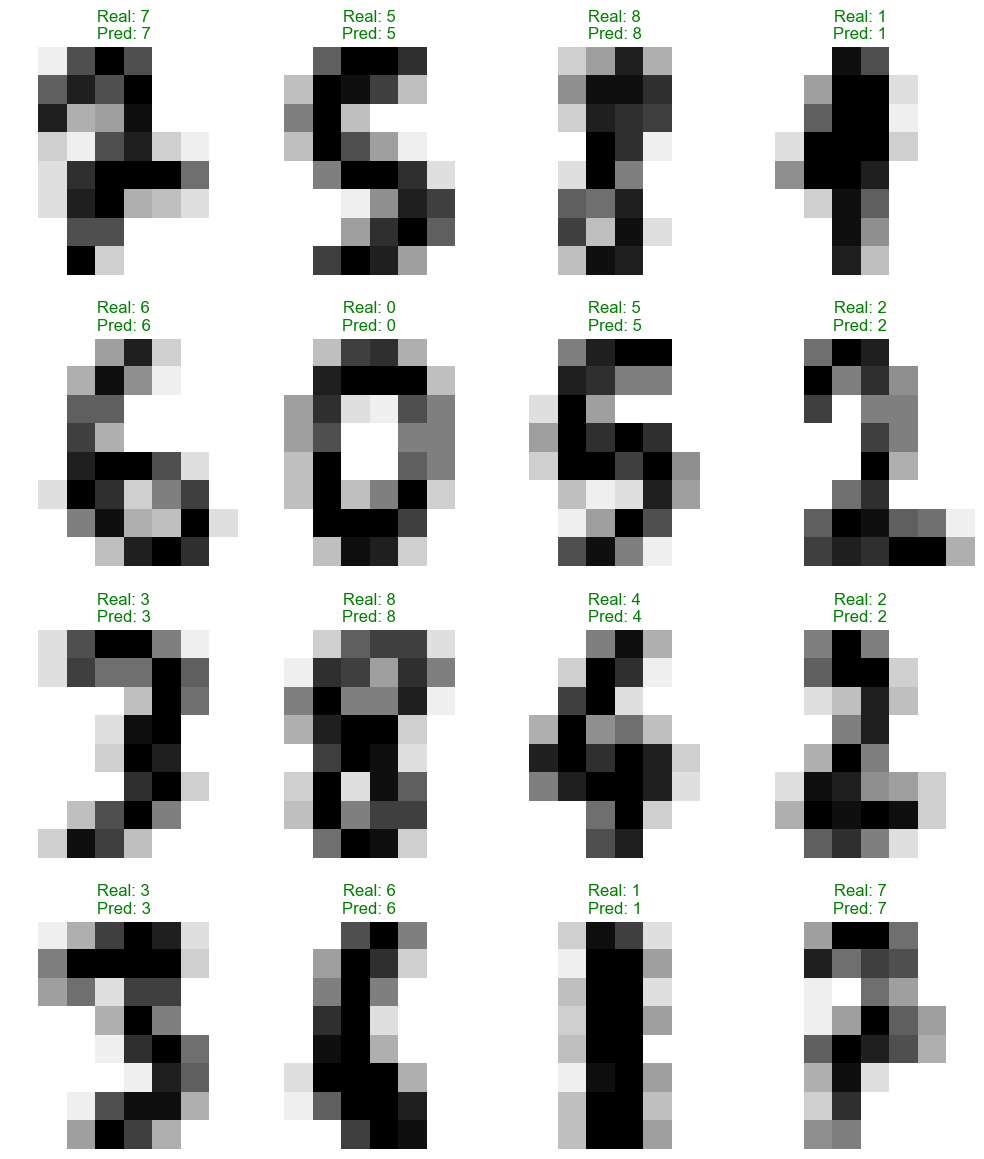

In [10]:
# Usamos los datos originales (sin escalar) para la visualización
# Y las predicciones que ya hicimos sobre los datos escalados
fig, axes = plt.subplots(4, 4, figsize=(10, 12))

for i, ax in enumerate(axes.ravel()):
    # Seleccionar una imagen aleatoria del conjunto de prueba
    idx = np.random.choice(len(X_test))
    
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    
    # Reshape la imagen de 64 a 8x8
    image = X_test[idx].reshape(8, 8)
    
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.axis('off')
    
    # Poner el título en verde si la predicción es correcta, en rojo si es incorrecta
    color = 'green' if true_label == predicted_label else 'red'
    ax.set_title(f'Real: {true_label}\nPred: {predicted_label}', color=color)

plt.tight_layout()
plt.show()

## Conclusión

En este tutorial, hemos construido con éxito una red neuronal que clasifica dígitos escritos a mano con alta precisión. Hemos cubierto los pasos clave:
1.  Carga y exploración de datos.
2.  Preprocesamiento (escalado y división).
3.  Definición de la arquitectura y entrenamiento del modelo.
4.  Evaluación cuantitativa (reporte y matriz de confusión) y cualitativa (inspección visual).

Este es un ejemplo simple, pero demuestra el poder y el flujo de trabajo general del uso de redes neuronales para tareas de clasificación. Frameworks más avanzados como TensorFlow o PyTorch ofrecen mucha más flexibilidad para construir arquitecturas complejas, pero `MLPClassifier` es una excelente puerta de entrada.